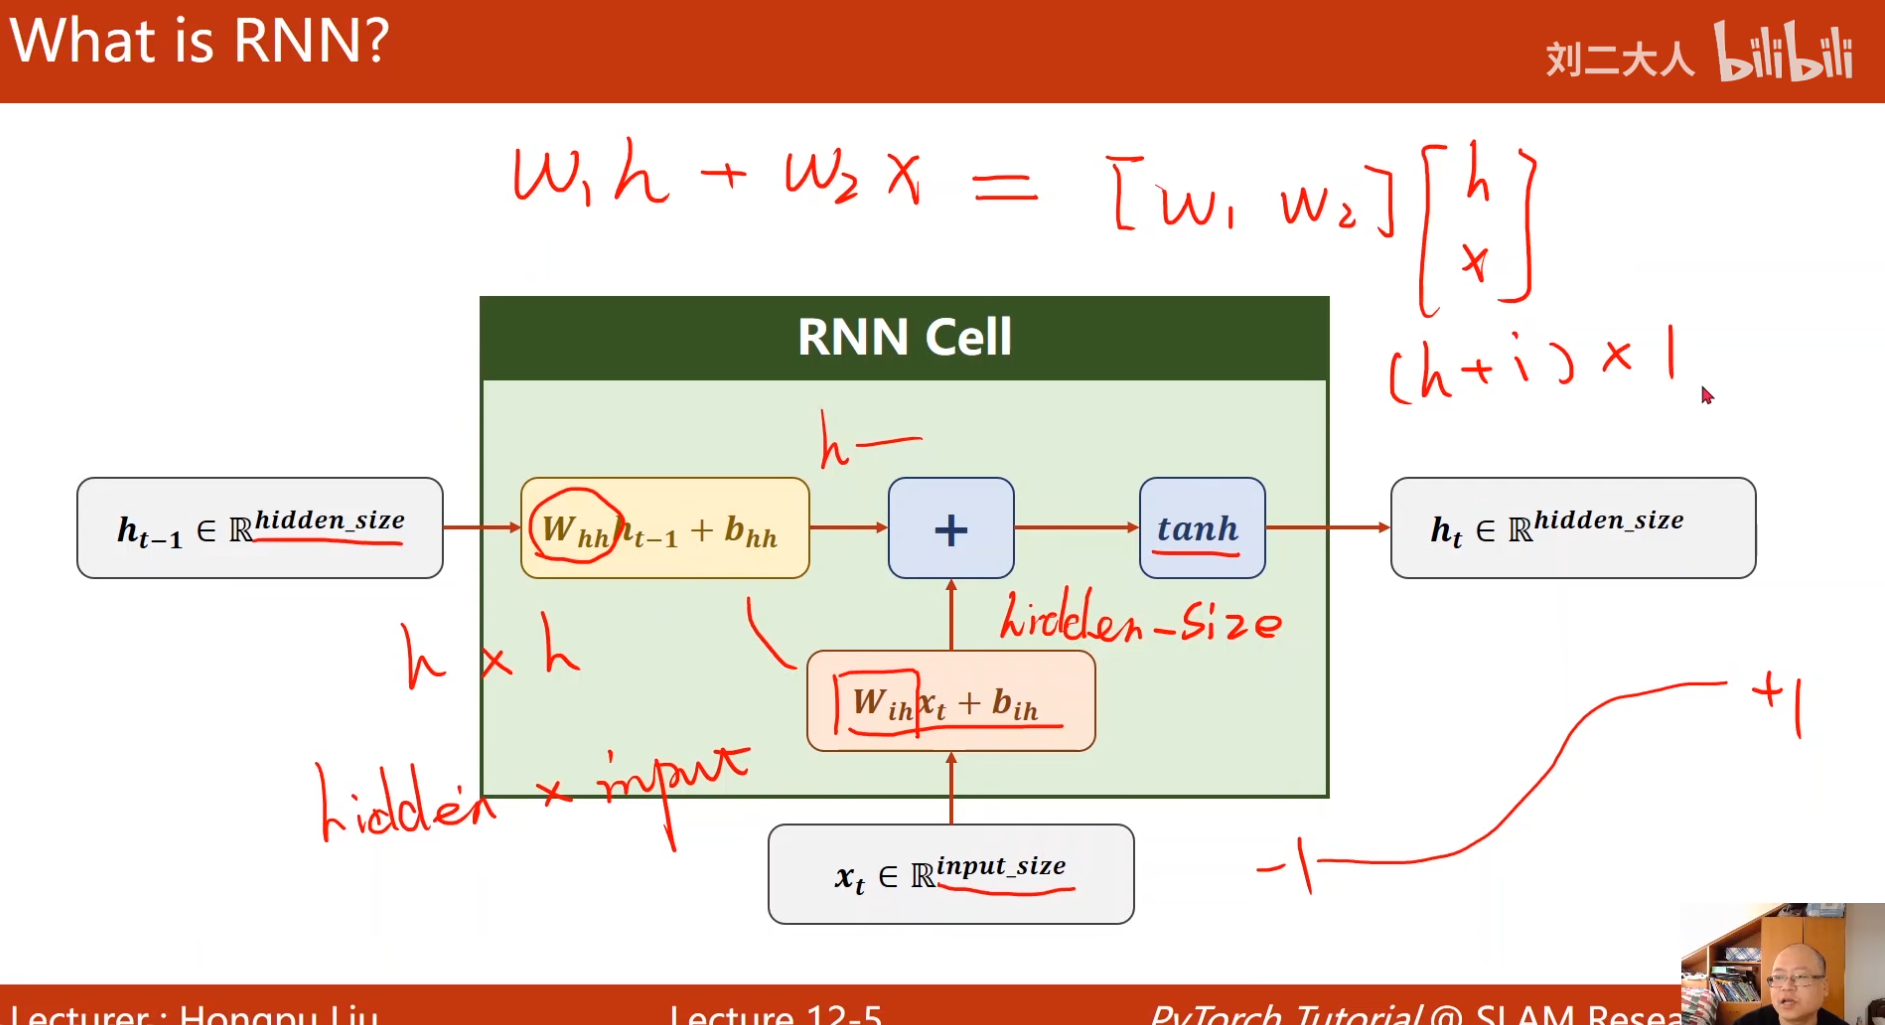
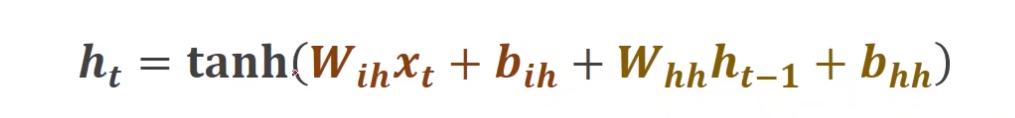

In [5]:
import torch
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2

cell = torch.nn.RNNCell(input_size= input_size,hidden_size= hidden_size)
dataset = torch.randn(seq_len,batch_size,input_size)
hidden = torch.zeros(batch_size,hidden_size)

for idx,input in enumerate(dataset):
    print("="*20,idx,"="*20)
    print("input size :",input.shape)
    hidden = cell(input,hidden)
    print("outputs size :",hidden.shape)
    print(hidden)
    


==================== 0 ====================
input size : torch.Size([1, 4])
outputs size : torch.Size([1, 2])
tensor([[ 0.9837, -0.7211]], grad_fn=<TanhBackward0>)
==================== 1 ====================
input size : torch.Size([1, 4])
outputs size : torch.Size([1, 2])
tensor([[0.8655, 0.5867]], grad_fn=<TanhBackward0>)
==================== 2 ====================
input size : torch.Size([1, 4])
outputs size : torch.Size([1, 2])
tensor([[0.9684, 0.5950]], grad_fn=<TanhBackward0>)


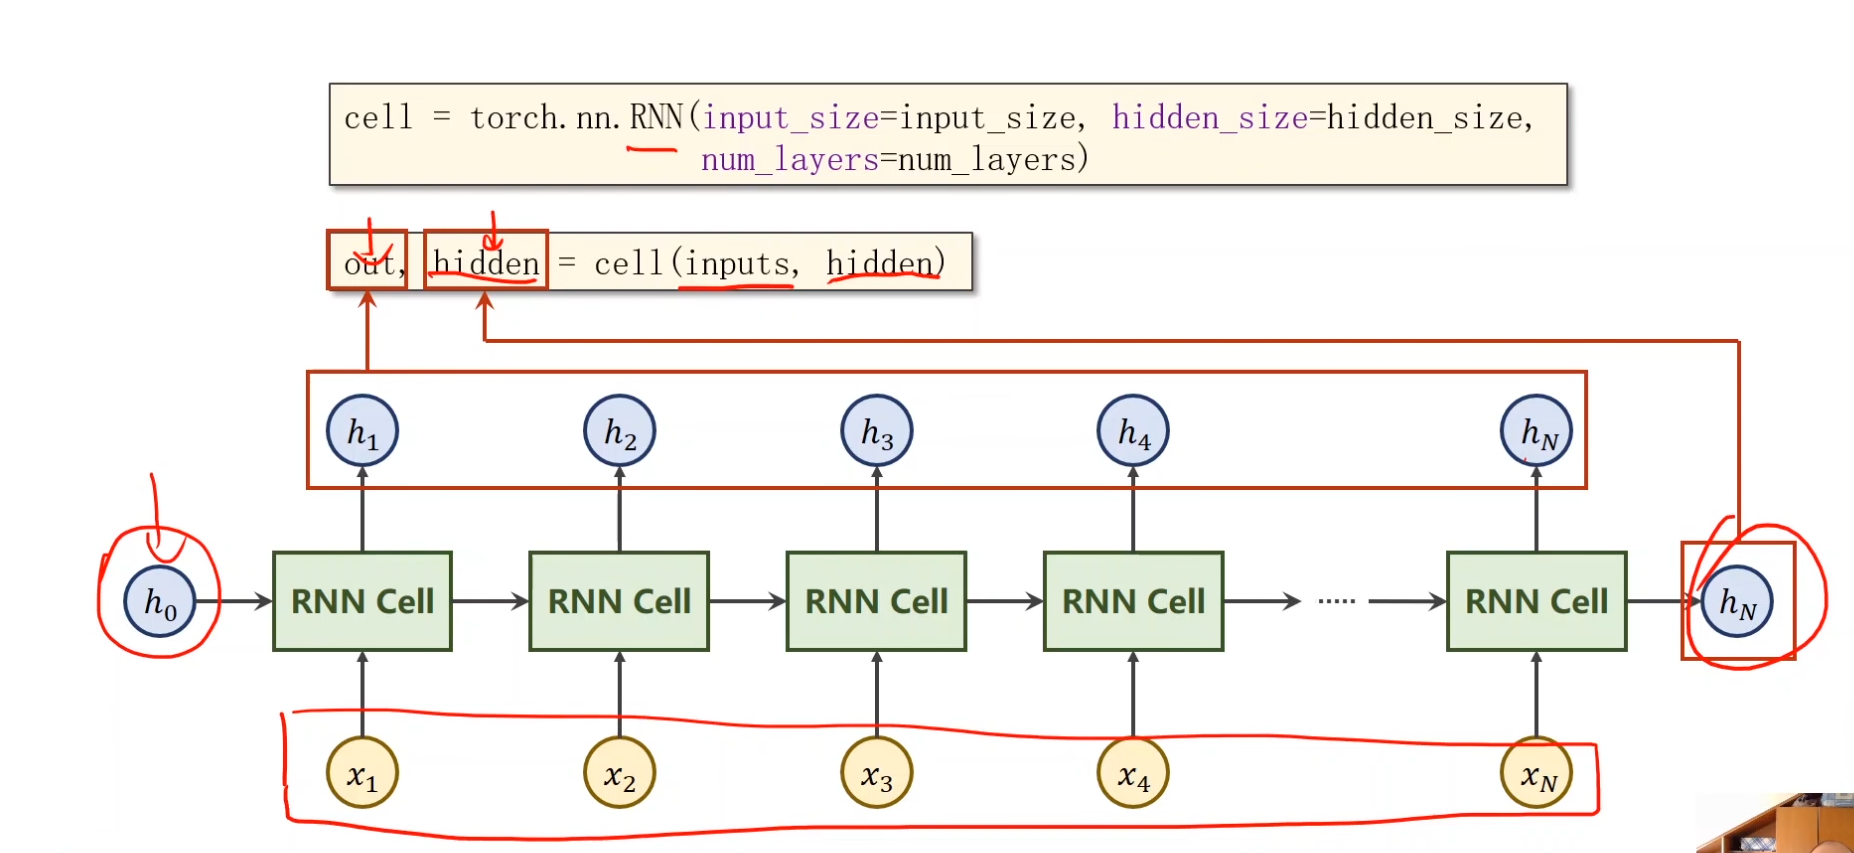
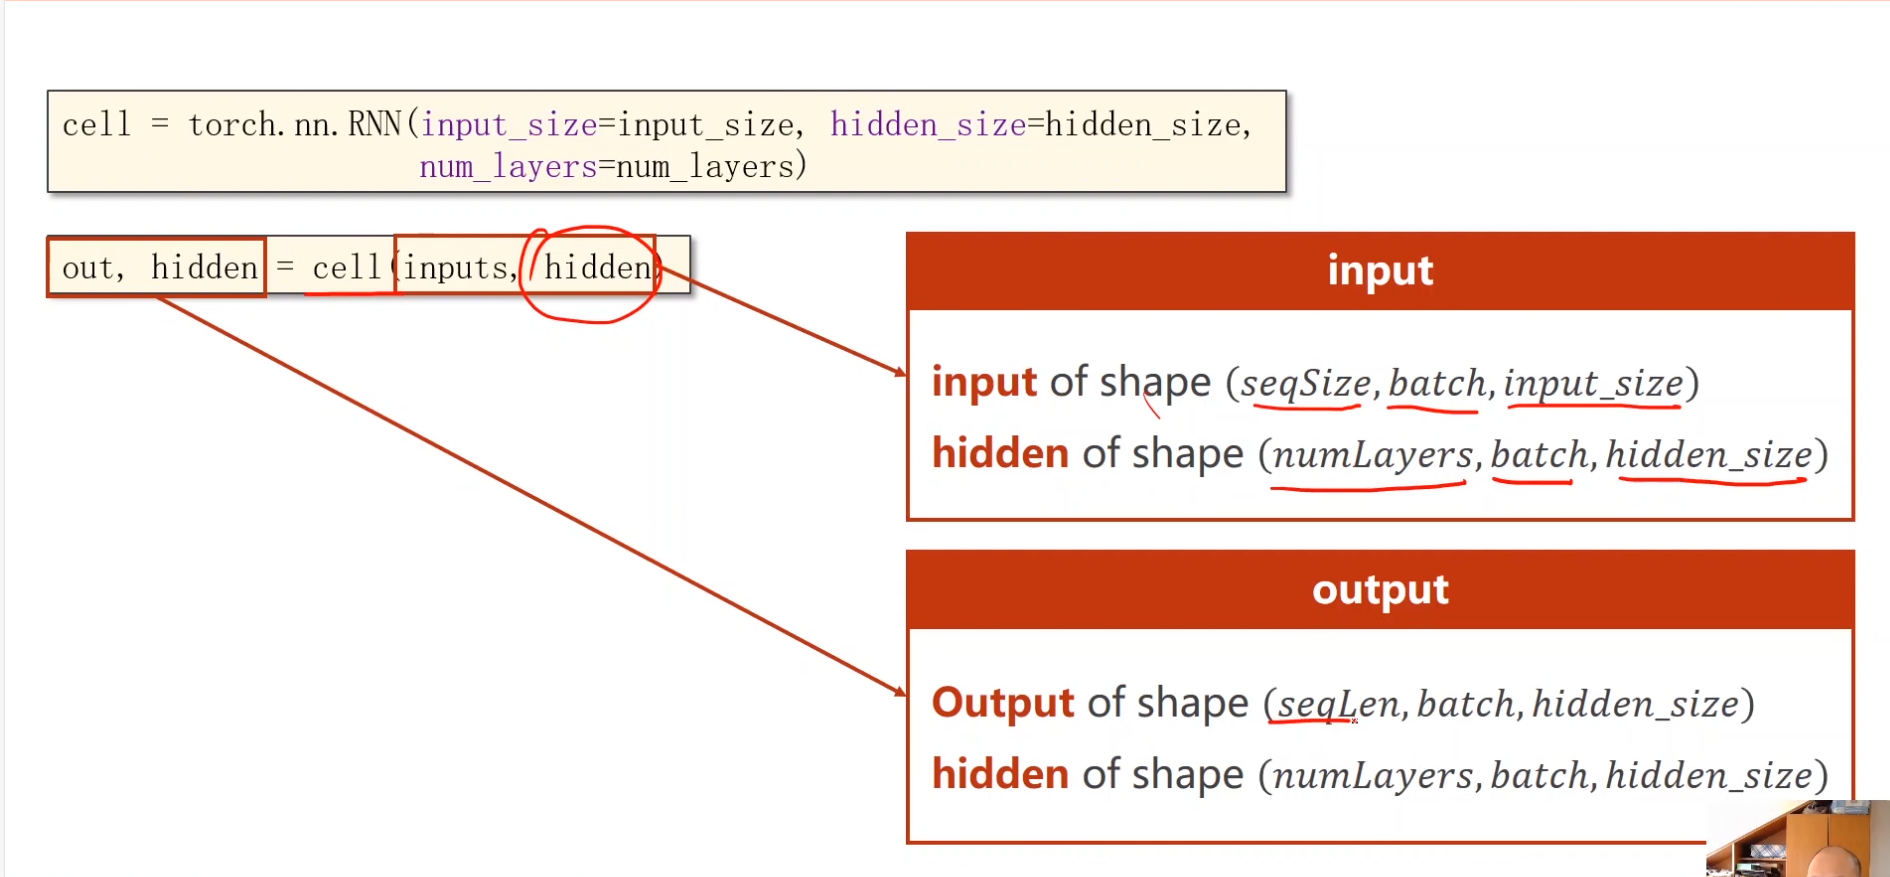
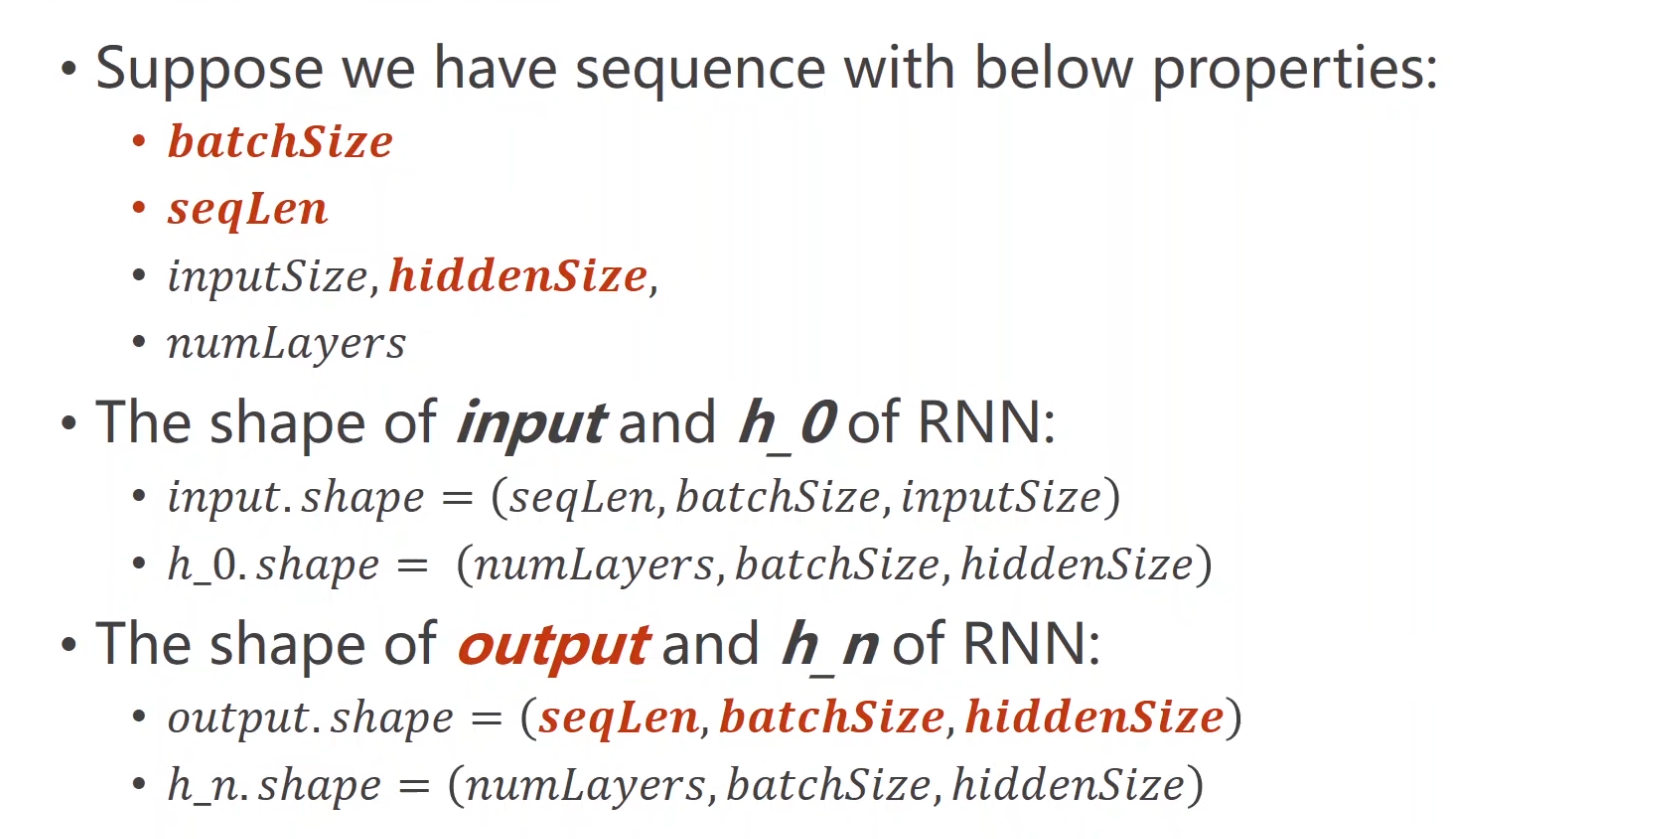
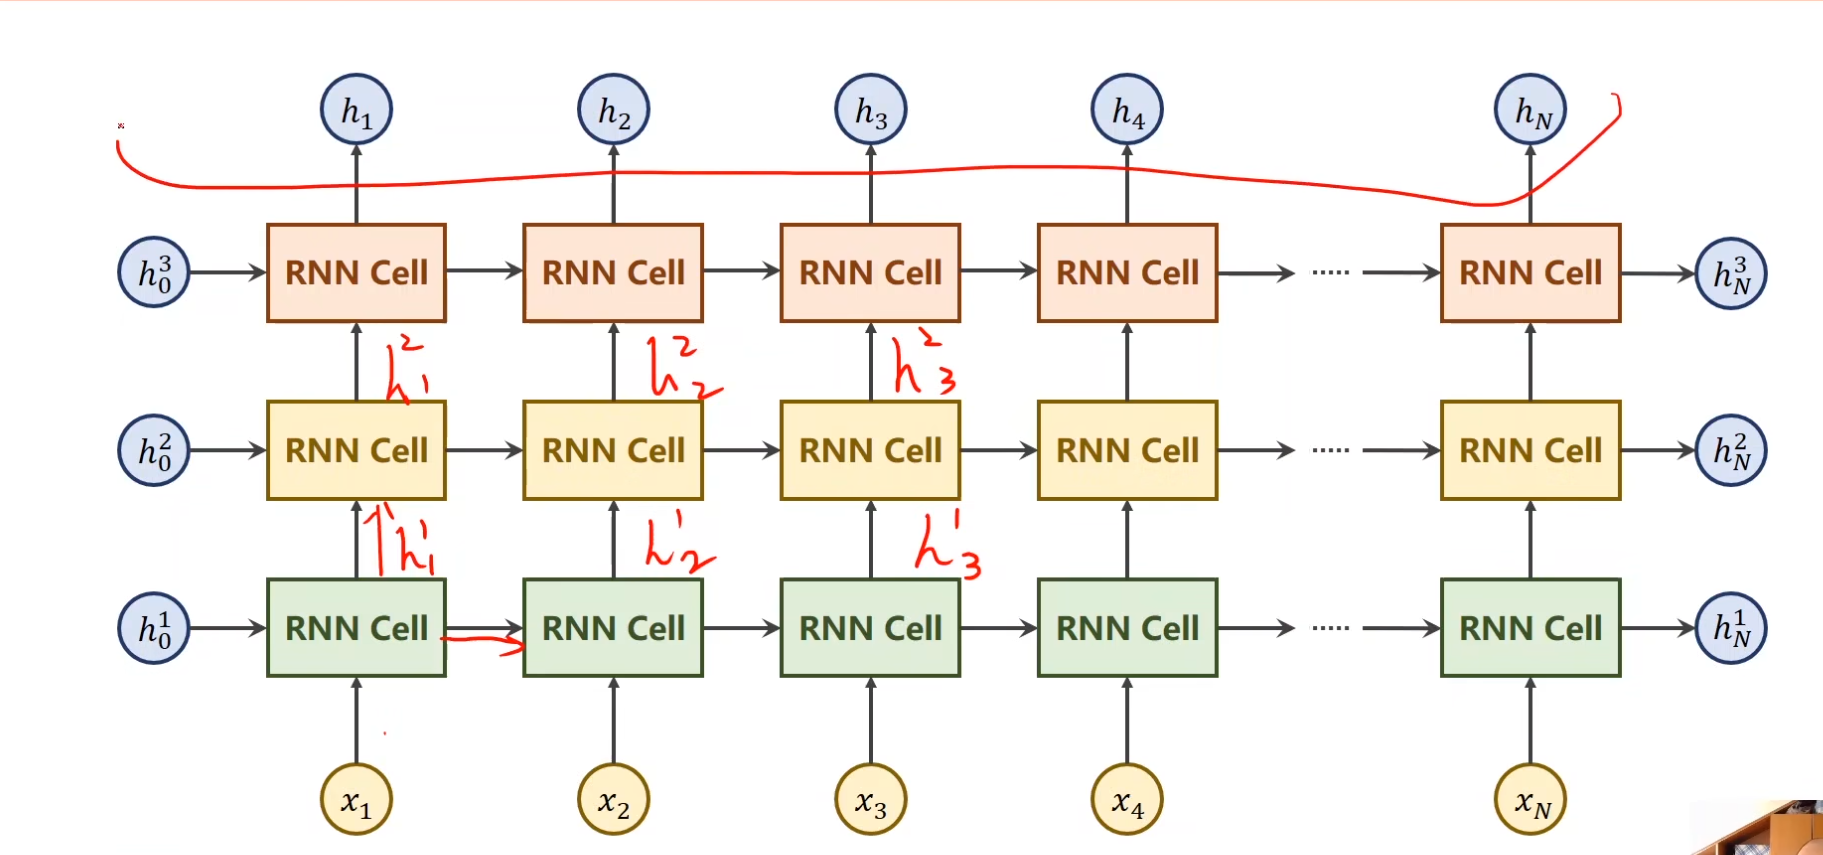

In [11]:
import torch
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2
num_layers = 3
cell = torch.nn.RNN(input_size= input_size,hidden_size= hidden_size,num_layers=num_layers)
dataset = torch.randn(seq_len,batch_size,input_size)
hidden = torch.zeros(num_layers,batch_size,hidden_size)
out,hidden = cell(dataset,hidden)
print(out)
print(out.shape)
print(hidden)
print(hidden.shape)

tensor([[[-0.7119, -0.8593]],

        [[-0.5556, -0.2842]],

        [[-0.6571, -0.6812]]], grad_fn=<StackBackward0>)
torch.Size([3, 1, 2])
tensor([[[-0.7972,  0.5281]],

        [[-0.8304, -0.7769]],

        [[-0.6571, -0.6812]]], grad_fn=<StackBackward0>)
torch.Size([3, 1, 2])


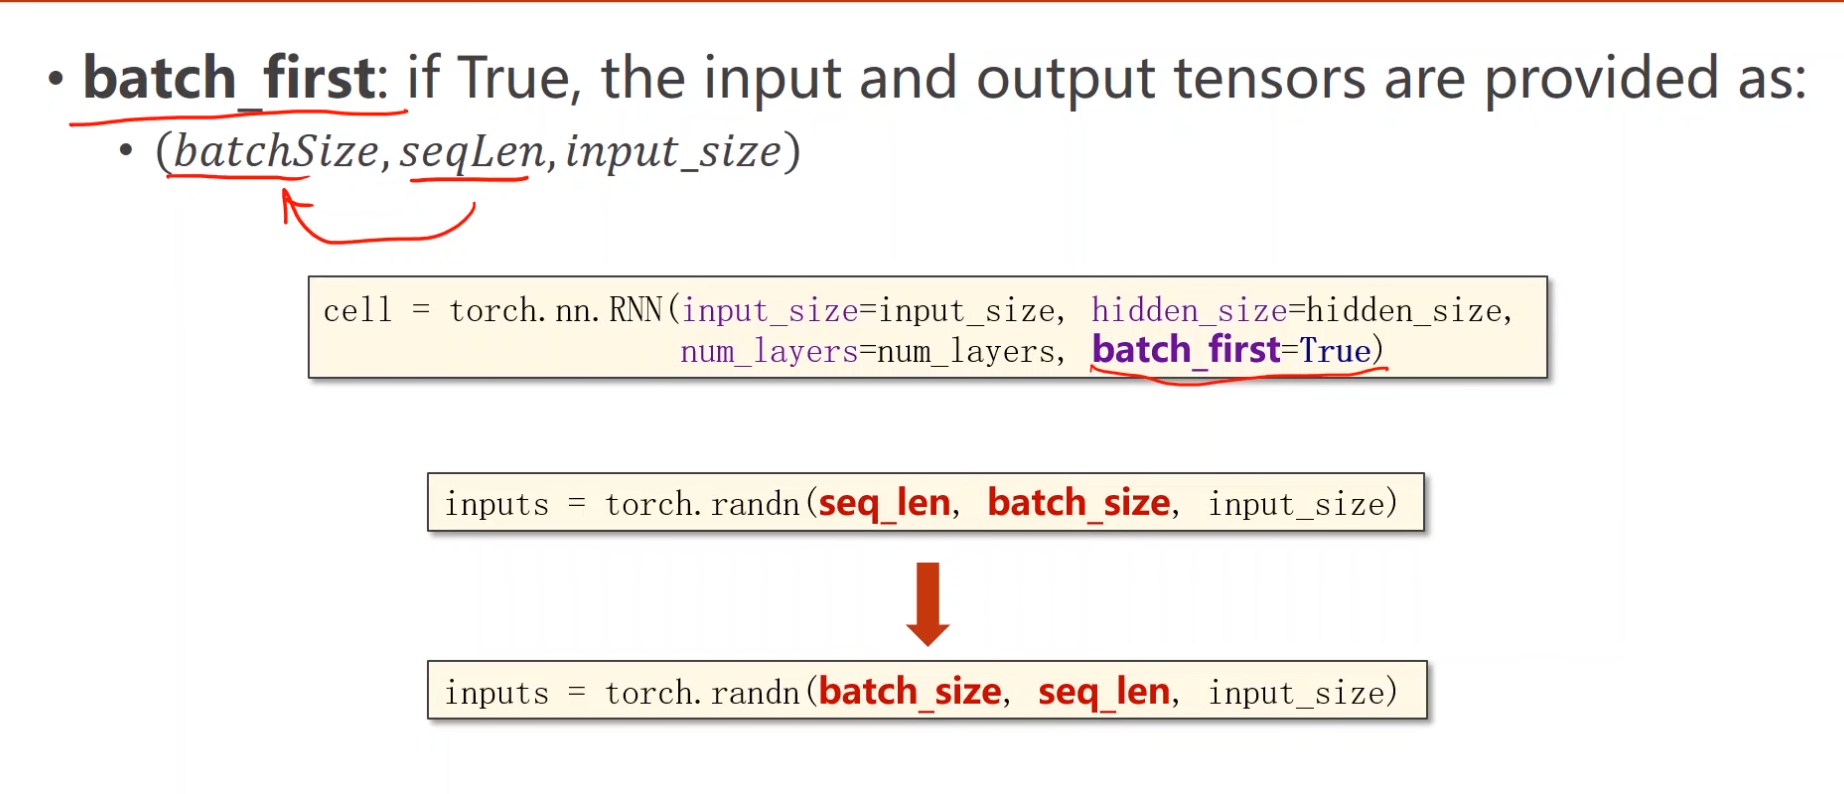

In [13]:
import torch
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2
num_layers = 3
cell = torch.nn.RNN(input_size= input_size,hidden_size= hidden_size,num_layers=num_layers,batch_first=True)
dataset = torch.randn(batch_size,seq_len,input_size)
hidden = torch.zeros(num_layers,batch_size,hidden_size)
out,hidden = cell(dataset,hidden)
print(out)
print(out.shape)
print(hidden)
print(hidden.shape)

tensor([[[-0.1647,  0.1190],
         [-0.1677, -0.2273],
         [-0.2808,  0.3527]]], grad_fn=<TransposeBackward1>)
torch.Size([1, 3, 2])
tensor([[[-0.6351, -0.7753]],

        [[ 0.1051, -0.8642]],

        [[-0.2808,  0.3527]]], grad_fn=<StackBackward0>)
torch.Size([3, 1, 2])


# 字符向量化，需要构造词典
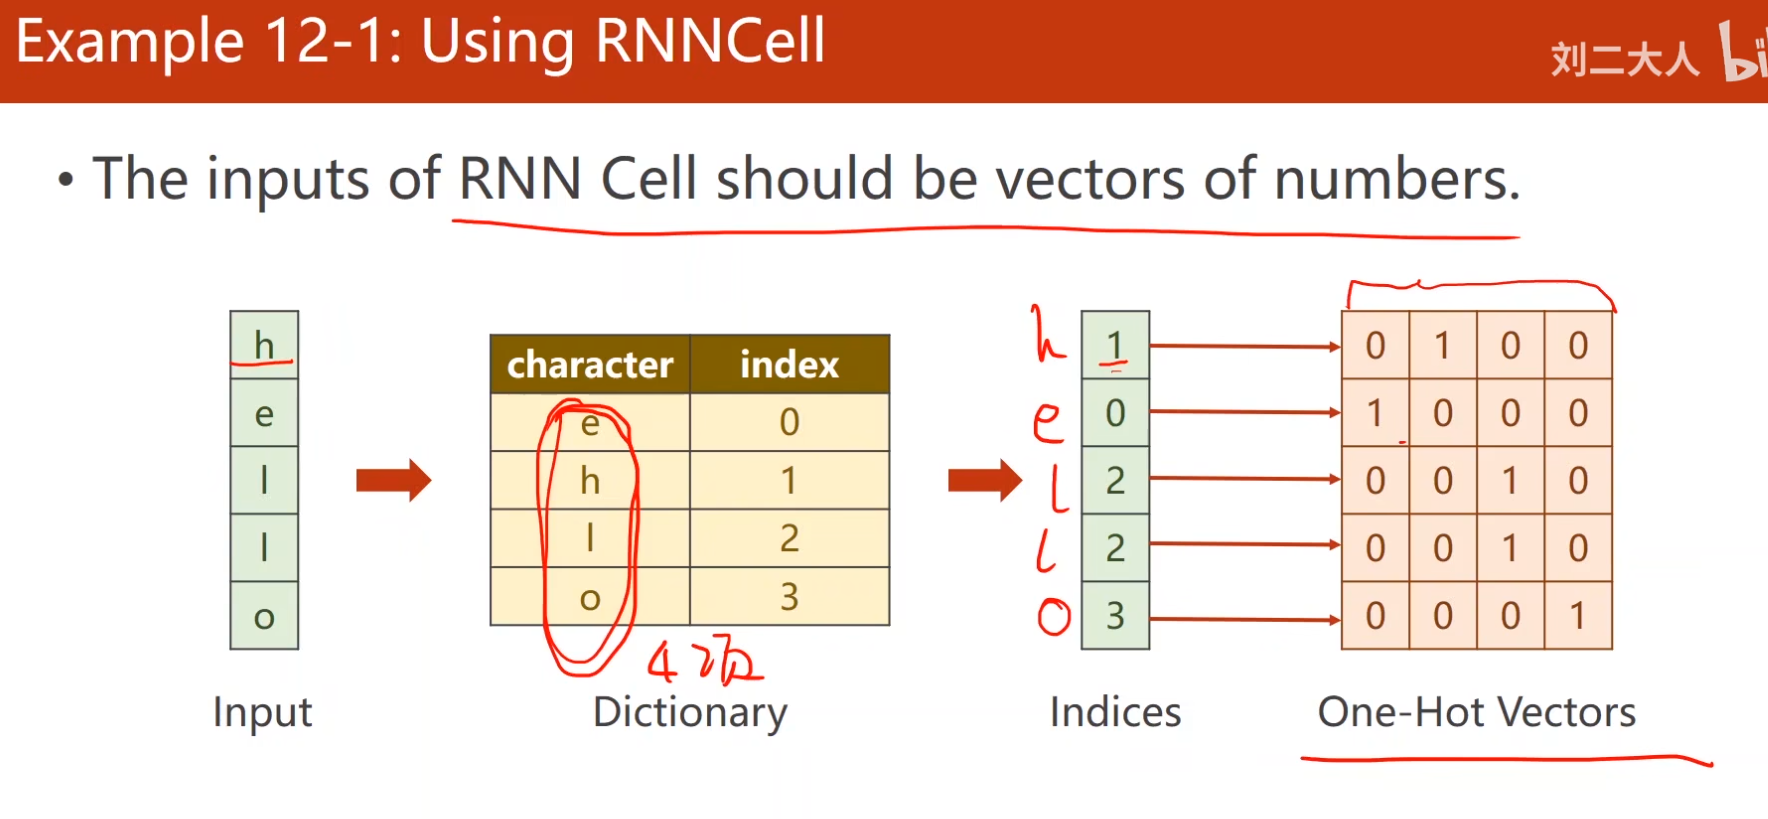
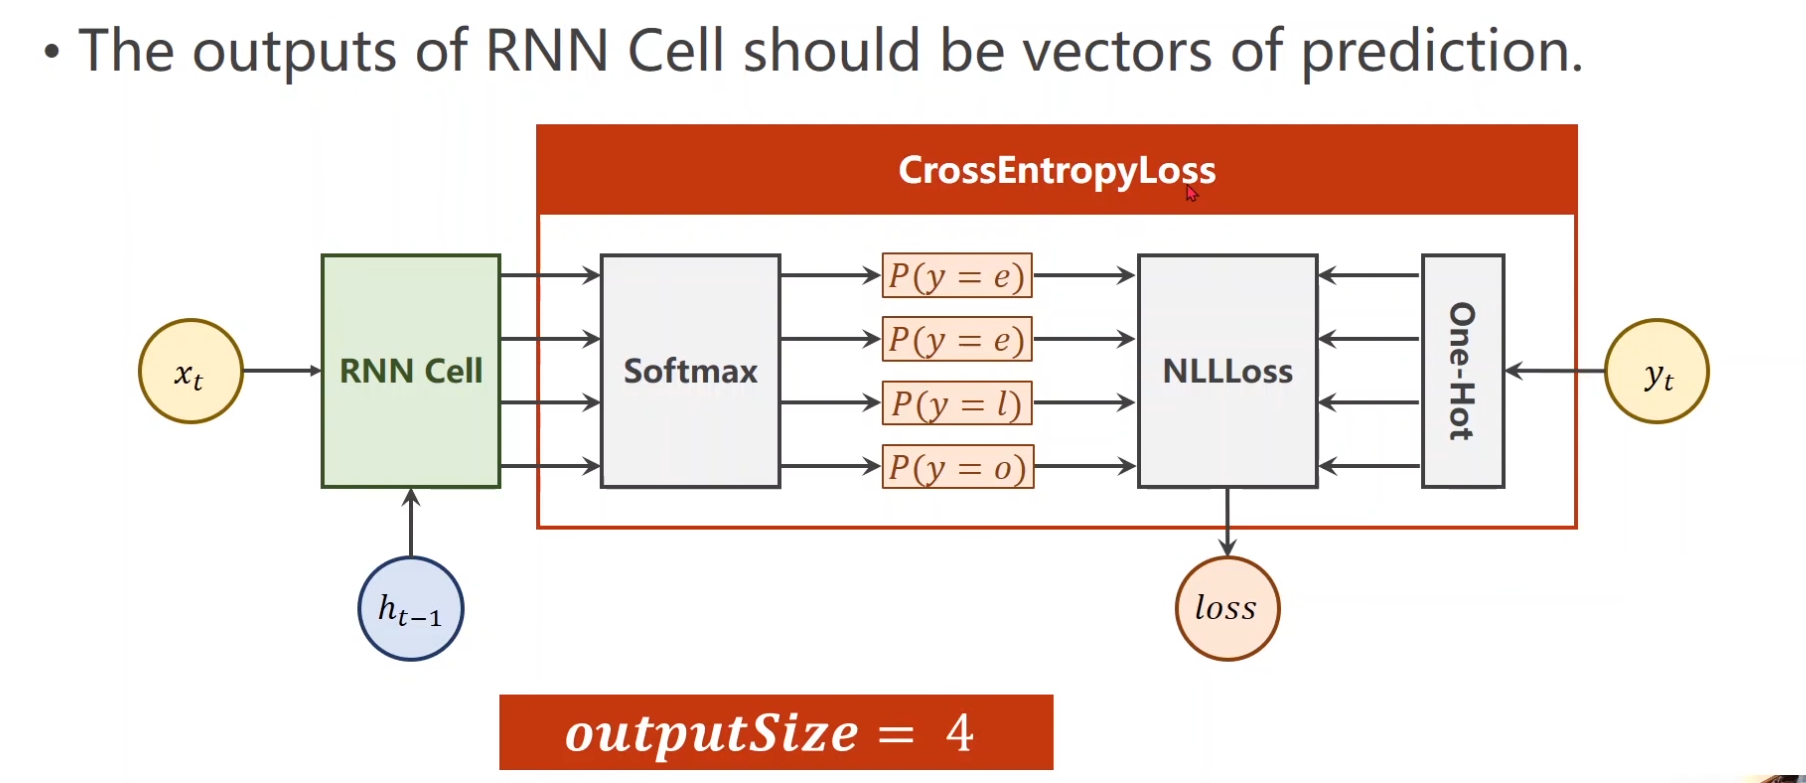

## use rnncell

In [15]:
import torch
batch_size = 1
input_size = 4
hidden_size = 4

# seq_len = 3
# num_layers = 3
idx2char = ['e','h','l','o']
x_data = [1,0,2,2,3]
y_data = [3,1,2,3,2]
one_hot_lookup = [[1,0,0,0,],
                 [0,1,0,0,],
                 [0,0,1,0,],
                 [0,0,0,1,]]
x_one_hot = [one_hot_lookup[x] for x in x_data]

inputs = torch.Tensor(x_one_hot).view(-1,batch_size,input_size)
labels = torch.LongTensor(y_data).view(-1,1)

In [17]:
class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_size,batch_size):
        super(Model,self).__init__()
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.rnncell = torch.nn.RNNCell(input_size = self.input_size,hidden_size= self.hidden_size)
    def forward(self,input,hidden):
        hidden = self.rnncell(input,hidden)
        return hidden
    def init_hidden(self):
        return torch.zeros(self.batch_size,self.hidden_size)
net = Model(input_size,hidden_size,batch_size)

In [33]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-1)
print('inputs.shape:',inputs.shape)
print('labels.shape:',labels.shape)
for epoch in range(15):
    loss= 0 
    optimizer.zero_grad()
    hidden = net.init_hidden();
    print ('pred string :',end = '')
    for input,label in zip(inputs,labels):        
        hidden = net(input,hidden)
        loss += criterion(hidden,label)
        __,idx = hidden.max(dim =1)
        print(idx2char[idx.item()],end='')
    loss.backward()
    optimizer.step()
    print(',epoch [%d/15] loss = %.4f'%(epoch +1,loss.item()))

inputs.shape: torch.Size([5, 1, 4])
labels.shape: torch.Size([5, 1])
pred string :ohlol,epoch [1/15] loss = 1.7254
pred string :ohlol,epoch [2/15] loss = 1.7251
pred string :ohlol,epoch [3/15] loss = 1.7248
pred string :ohlol,epoch [4/15] loss = 1.7245
pred string :ohlol,epoch [5/15] loss = 1.7243
pred string :ohlol,epoch [6/15] loss = 1.7240
pred string :ohlol,epoch [7/15] loss = 1.7238
pred string :ohlol,epoch [8/15] loss = 1.7235
pred string :ohlol,epoch [9/15] loss = 1.7233
pred string :ohlol,epoch [10/15] loss = 1.7230
pred string :ohlol,epoch [11/15] loss = 1.7228
pred string :ohlol,epoch [12/15] loss = 1.7226
pred string :ohlol,epoch [13/15] loss = 1.7223
pred string :ohlol,epoch [14/15] loss = 1.7221
pred string :ohlol,epoch [15/15] loss = 1.7219


## use rnn

In [47]:
import torch
batch_size = 1
input_size = 4
hidden_size = 4

# seq_len = 3
# num_layers = 3
idx2char = ['e','h','l','o']
x_data = [1,0,2,2,3]
y_data = [3,1,2,3,2]
one_hot_lookup = [[1,0,0,0,],
                 [0,1,0,0,],
                 [0,0,1,0,],
                 [0,0,0,1,]]
x_one_hot = [one_hot_lookup[x] for x in x_data]

inputs = torch.Tensor(x_one_hot).view(-1,batch_size,input_size)
labels = torch.LongTensor(y_data)

In [48]:
num_layers = 1
class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_size,batch_size,num_layers = 1):
        super(Model,self).__init__()
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        self.rnn = torch.nn.RNN(input_size = self.input_size,hidden_size= self.hidden_size,num_layers = self.num_layers)
    
    def forward(self,input): 
        hidden = torch.zeros(self.num_layers,self.batch_size,self.hidden_size)
        out,_ = self.rnn(input,hidden)
        return out.view(-1,self.hidden_size)
        
net = Model(input_size,hidden_size,batch_size,num_layers)

In [51]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-1)
print('inputs.shape:',inputs.shape)
print('labels.shape:',labels)
print(outputs)
for epoch in range(15):
    optimizer.zero_grad()
    outputs = net(inputs);
    print('outputs.shape:',outputs.shape)
    print('labels.shape:',labels.shape)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    
    __,idx = outputs.max(dim =1)
    idx = idx.data.numpy()
    print ('pred string :',''.join(idx2char[x] for x in idx),end='')
    print(',epoch [%d/15] loss = %.4f'%(epoch +1,loss.item()))

inputs.shape: torch.Size([5, 1, 4])
labels.shape: tensor([3, 1, 2, 3, 2])
tensor([[-0.9998, -0.9982, -0.9507,  0.9730],
        [-0.9973,  0.9882, -0.9077, -0.9467],
        [-0.9955, -0.9996,  0.9948, -0.9826],
        [-0.9968, -0.8283, -0.9944,  0.9991],
        [-0.9999, -0.9635,  0.9853, -0.9976]], grad_fn=<ViewBackward0>)
outputs.shape: torch.Size([5, 4])
labels.shape: torch.Size([5])
pred string : ohlol,epoch [1/15] loss = 0.3509
outputs.shape: torch.Size([5, 4])
labels.shape: torch.Size([5])
pred string : ohlol,epoch [2/15] loss = 0.3492
outputs.shape: torch.Size([5, 4])
labels.shape: torch.Size([5])
pred string : ohlol,epoch [3/15] loss = 0.3464
outputs.shape: torch.Size([5, 4])
labels.shape: torch.Size([5])
pred string : ohlol,epoch [4/15] loss = 0.3452
outputs.shape: torch.Size([5, 4])
labels.shape: torch.Size([5])
pred string : ohlol,epoch [5/15] loss = 0.3446
outputs.shape: torch.Size([5, 4])
labels.shape: torch.Size([5])
pred string : ohlol,epoch [6/15] loss = 0.3441
outp